In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os

print(os.getpid())
%cd ../

19432
/media/work/docs/codes/c++/QSVT_framework/simulations


In [2]:
import pylib.measurement as mse
import pylib.mix as mix
def get_norm(AA):
    N = len(AA)
    
    max_root = 0
    for i in range(N):
        sr = np.sqrt(np.sum(np.abs(AA[i, :])**2))
        if sr > max_root:
            max_root = sr
    return max_root

def get_a(v):
    return 2 * np.arccos(v)

writing the initial state oto the file:
./tests/small-qsvt-real//AA_INIT_STATE.hdf5
Done

-- Normalized extended initial vector --
        0.500000         0.500000         0.500000         0.500000 

-- Rotation angles --
aa 2.532207e+00
ab 2.941258e+00


<IPython.core.display.Javascript object>


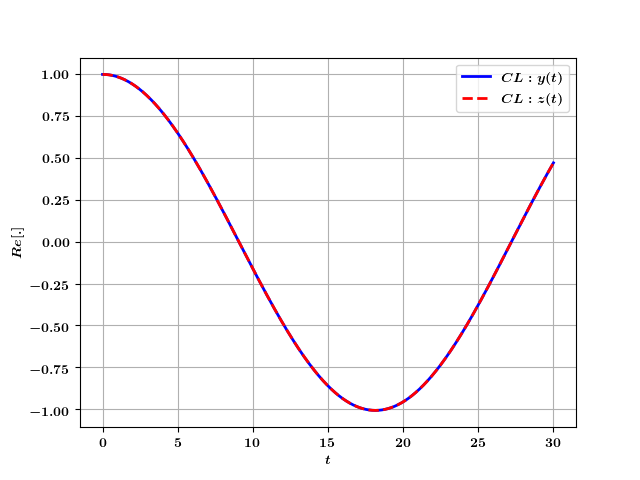

<IPython.core.display.Javascript object>


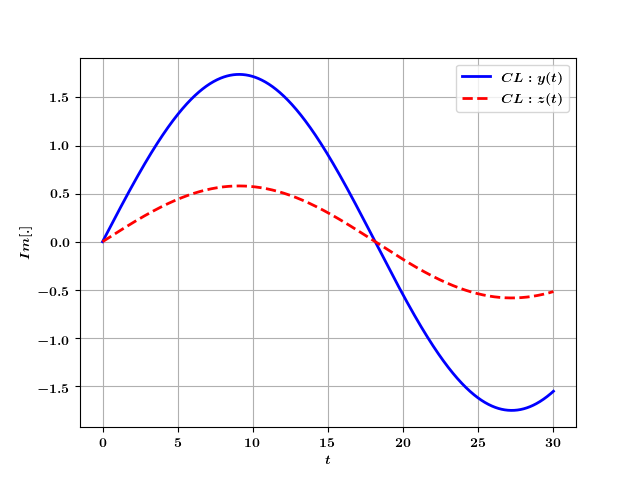

In [3]:
# ---------------------------------------------------------------
# --- CLASSICAL: REAL COEFFICIENTS: NON-HERMITIAN HAMILTONIAN ---
# ---------------------------------------------------------------
# d_t y = i * coef[0] * z;
# d_t z = i * coef[1] * y.
# Here, coef[:] are real values.
# ---
# psi = [y, z];
# ---
# d_t psi = i * H * psi;
# psi(t) = exp(i*t*H) * psi(0);
# ---
# H = |       0, coefs[0]|
#     |coefs[1],       0 | 
mix.reload_module(mix)

name_file_start = "AA"
path_root = "./tests/small-qsvt-real/"

nt    = 1001
t_end = 30
coefs = [0.3, 0.1]     # non-hermitian matrix
# coefs = [0.3, 0.3]   # hermitian matrix
psi0  = [1, 1]

t = np.linspace(0, t_end, nt)
dt = t[1] - t[0]
y = np.zeros(nt, dtype = np.complex)
z = np.zeros(nt, dtype = np.complex)

y[0] = psi0[0]
z[0] = psi0[0]

for id_t in range(1, nt):
    y[id_t] = y[id_t-1] + dt * 1j * coefs[0] * z[id_t-1]
    z[id_t] = z[id_t-1] + dt * 1j * coefs[1] * y[id_t-1]
    
# *****************************************************
# *** INITIAL VECTOR, ROTATION ANGLES ***
# *****************************************************
# coef_norm = np.sqrt(np.sum(np.abs(psi0)**2))
# psi0_norm = psi0 / coef_norm
# mix.write_init_state(name_file_start, path_root, np.real(psi0_norm), np.imag(psi0_norm))
# print("\n-- Normalized initial vector --")
# mix.print_array(psi0_norm, ff=[16, 6, "f"])

psi0_ext_norm = np.zeros(2*np.size(psi0))
psi0_ext_norm[0:np.size(psi0)] = psi0[:]                # or complex conjugated
psi0_ext_norm[np.size(psi0):2*np.size(psi0)] = psi0[:]  # or complex conjugated
coef_norm = np.sqrt(np.sum(np.abs(psi0_ext_norm)**2))
psi0_ext_norm = psi0_ext_norm / coef_norm
mix.write_init_state(name_file_start, path_root, np.real(psi0_ext_norm), np.imag(psi0_ext_norm))

print("\n-- Normalized extended initial vector --")
mix.print_array(psi0_ext_norm, ff=[16, 6, "f"])

print("\n-- Rotation angles --")
print(   "aa {:0.6e}".format(get_a(coefs[0]))   )
print(   "ab {:0.6e}".format(get_a(coefs[1]))   )

    
# *****************************************************
# *** PLOTTING ***
# *****************************************************
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    t, np.real(y[:]), 
    color='b', 
#     marker="o", 
    linewidth = 2, linestyle='-', 
    label = "$CL: y(t)$"
)
ax.plot(
    t, np.real(z[:]),  
    color='r', 
#     marker="s", 
    linewidth = 2, linestyle='--',
    label = "$CL: z(t)$" 
)
plt.xlabel('$t$')
plt.ylabel("$Re[.]$")
ax.legend()
plt.grid(True)
plt.show()
# plt.savefig(path_fig + label_y + '-real.png')


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    t, np.imag(y[:]), 
    color='b', 
#     marker="o", 
    linewidth = 2, linestyle='-', 
    label = "$CL: y(t)$"
)
ax.plot(
    t, np.imag(z[:]),  
    color='r', 
#     marker="s", 
    linewidth = 2, linestyle='--',
    label = "$CL: z(t)$" 
)
plt.xlabel('$t$')
plt.ylabel("$Im[.]$")
ax.legend()
plt.grid(True)
plt.show()
# plt.savefig(path_fig + label_y + '-real.png')

---
Reading the file ./tests/small-qsvt-real//AA_t2_OUTPUT.hdf5...
Name of the simulation is AA
Simulation has been performed  03-16-2022 20:47:53
---
Reading the file ./tests/small-qsvt-real//AA_t4_OUTPUT.hdf5...
Name of the simulation is AA
Simulation has been performed  03-16-2022 20:52:13
---
Reading the file ./tests/small-qsvt-real//AA_t6_OUTPUT.hdf5...
Name of the simulation is AA
Simulation has been performed  03-16-2022 20:52:40
---
Reading the file ./tests/small-qsvt-real//AA_t8_OUTPUT.hdf5...
Name of the simulation is AA
Simulation has been performed  03-16-2022 20:52:59
---
Reading the file ./tests/small-qsvt-real//AA_t10_OUTPUT.hdf5...
Name of the simulation is AA
Simulation has been performed  03-16-2022 20:53:20


<IPython.core.display.Javascript object>


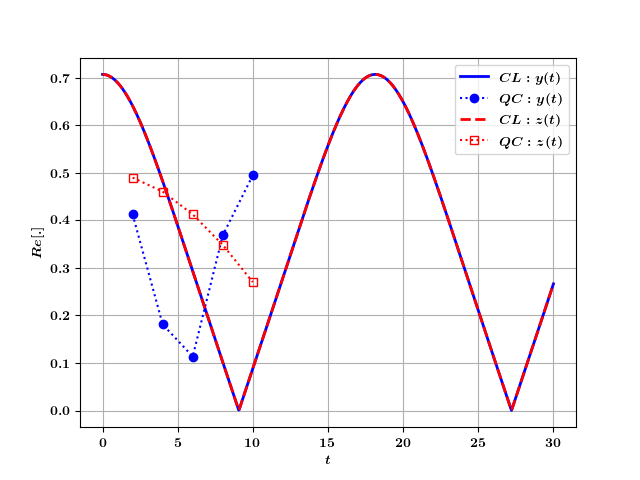

<IPython.core.display.Javascript object>


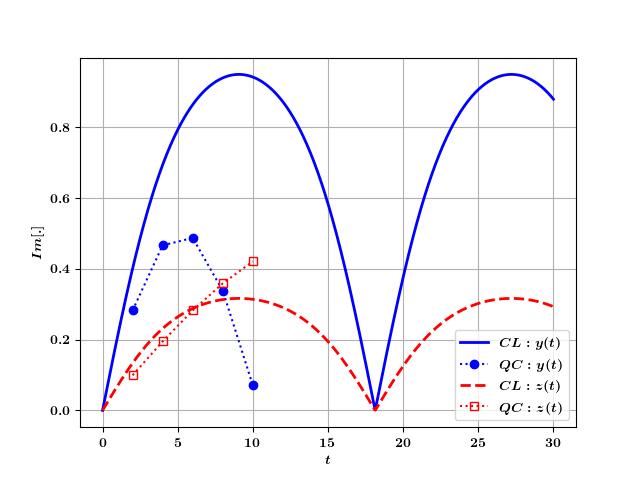

In [9]:
# -------------------------------------------------------------
# --- QUANTUM: COMPARISON WITH CLASSICAL: REAL COEFFICIENTS ---
# -------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(mse)

# qc_time_points    = [2, 4, 6, 8, 10, 12, 14, 16, 17, 18, 20]
qc_time_points    = [2, 4, 6, 8, 10]
y_qc = np.zeros(np.size(qc_time_points), dtype=np.complex)
z_qc = np.zeros(np.size(qc_time_points), dtype=np.complex)

# for counter_time_point in range(len(qc_time_points)):
#     print("---")
#     line_time_point = "t{:d}".format(qc_time_points[counter_time_point])   # for non-hermitian
# #     line_time_point = "ht{:d}".format(qc_time_points[counter_time_point])    # for hermitian
    
#     oor = mse.MeasDyn__();
#     oor.pname_ = name_file_start + "_" + line_time_point
#     oor.path_  = path_root
#     oor.open()
#     oor.read_output_states()

# #     print(" time point: ", line_time_point)
# #     oor.print_rel_state(-1)
    
#     res_as, res_states = oor.get_rel_ampl({"r": 0} , -1);
#     y_qc[counter_time_point] = res_as[0]
    
#     res_as, res_states = oor.get_rel_ampl({"r": 1} , -1);
#     z_qc[counter_time_point] = res_as[0]
    
    
for counter_time_point in range(len(qc_time_points)): # for the extended initial vector
    print("---")
    line_time_point = "t{:d}".format(qc_time_points[counter_time_point])   
    
    oor = mse.MeasDyn__();
    oor.pname_ = name_file_start + "_" + line_time_point
    oor.path_  = path_root
    oor.open()
    oor.read_output_states()
    
    res_as, res_states = oor.get_rel_ampl({"h": 0, "r": 0} , -1);
    y_qc[counter_time_point] = res_as[0]
    
    res_as, res_states = oor.get_rel_ampl({"h": 0, "r": 1} , -1);
    z_qc[counter_time_point] = res_as[0]
    
    
# *****************************************************
# *** Normalize classical simulations ***
# *****************************************************
y_norm = np.zeros(nt, dtype = np.complex)
z_norm = np.zeros(nt, dtype = np.complex)
for id_t in range(nt):
    coef_norm = np.sqrt(np.abs(y[id_t])**2 + np.abs(z[id_t])**2)
    y_norm[id_t] = y[id_t] / coef_norm
    z_norm[id_t] = z[id_t] / coef_norm
    
    

# *****************************************************
# *** PLOTTING: comparison ***
# *****************************************************
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(t,              np.real(y_norm[:]),    color='b',  linewidth = 2, linestyle='-', label = "$CL: y(t)$")
# ax.plot(qc_time_points, np.real(y_qc[:]), color='b', marker="o", linewidth = 2,  label = "$QC: y(t)$")
# ax.plot(t,              np.real(z_norm[:]),    color='r', linewidth = 2, linestyle='--',label = "$CL: z(t)$")
# ax.plot(qc_time_points, np.real(z_qc[:]), color='r', marker="s", linewidth = 2,  label = "$QC: z(t)$")
# plt.xlabel('$t$')
# plt.ylabel("$Re[.]$")
# ax.legend()
# plt.grid(True)
# plt.show()
# # plt.savefig(path_fig + label_y + '-real.png')

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(t,              np.imag(y_norm[:]),    color='b',  linewidth = 2, linestyle='-', label = "$CL: y(t)$")
# ax.plot(qc_time_points, np.imag(y_qc[:]), color='b', marker="o", linewidth = 2,  label = "$QC: y(t)$")
# ax.plot(t,              np.imag(z_norm[:]),    color='r', linewidth = 2, linestyle='--',label = "$CL: z(t)$")
# ax.plot(qc_time_points, np.imag(z_qc[:]), color='r', marker="s", linewidth = 2,  label = "$QC: z(t)$")
# plt.xlabel('$t$')
# plt.ylabel("$Im[.]$")
# ax.legend()
# plt.grid(True)
# plt.show()
# # plt.savefig(path_fig + label_y + '-real.png')



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.abs(np.real(y_norm[:])), 
        color='b', linewidth = 2, linestyle='-', label = "$CL: y(t)$")
ax.plot(qc_time_points, np.abs(np.real(y_qc[:])),   
        color='b', marker="o", linestyle = ':',  label = "$QC: y(t)$")
ax.plot(t, np.abs(np.real(z_norm[:])), 
        color='r', linewidth = 2, linestyle='--',label = "$CL: z(t)$")
ax.plot(qc_time_points, np.abs(np.real(z_qc[:])),   
        color='r', marker="s", markerfacecolor='none', linestyle = ':',  label = "$QC: z(t)$")
plt.xlabel('$t$')
plt.ylabel("$Re[.]$")
ax.legend()
plt.grid(True)
plt.show()
# plt.savefig(path_fig + label_y + '-real.png')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.abs(np.imag(y_norm[:])),    
        color='b',  linewidth = 2, linestyle='-', label = "$CL: y(t)$")
ax.plot(qc_time_points, np.abs(np.imag(y_qc[:])), 
        color='b', marker="o", linestyle = ':',  label = "$QC: y(t)$")
ax.plot(t, np.abs(np.imag(z_norm[:])),    
        color='r', linewidth = 2, linestyle='--',label = "$CL: z(t)$")
ax.plot(qc_time_points, np.abs(np.imag(z_qc[:])), 
        color='r', marker="s", markerfacecolor='none', linestyle = ':',  label = "$QC: z(t)$")
plt.xlabel('$t$')
plt.ylabel("$Im[.]$")
ax.legend()
plt.grid(True)
plt.show()
# # plt.savefig(path_fig + label_y + '-real.png')

In [42]:
y_qc

array([-0.267-0.701j])

In [43]:
z_qc

array([0.091+0.655j])